# Krótkie wprowadzenie do pandas

Importujemy bibliotekę pandas i moduł pyplot z matplotlib.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

### Przykład - dane astronomiczne

Odczytujemy dane z pliku *hubble_data.csv* i wyświetlamy kilka pierwszych wierszy.

In [116]:
data = pd.read_csv("hubble_data.csv")
data.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


Możemy także wyświetlić kilka podstawowych statystyk.

In [117]:
data.describe()

,distance,recession_velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


Tworzymy wykres na podstawie wczytanych danych.

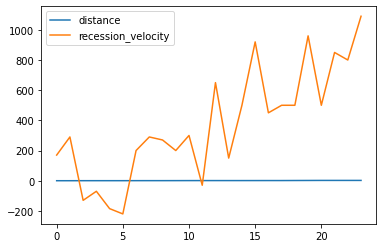

In [118]:
data.plot()
plt.show()

Pandas domyslnie dodaje indeks do naszych danych, co utrudnia utworzenie sensownego wykresu.
Usuwamy więc niepotrzebny indeks i zastepujemy go kolumną *distance*.

In [119]:
data.set_index("distance", inplace= True)
data.head()

,recession_velocity
distance,
0.032,170
0.034,290
0.214,-130
0.263,-70
0.275,-185


Ponownie tworzymy wykres i wyświetlamy go.

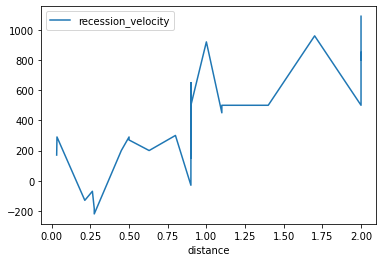

In [120]:
data.plot()
plt.show()

### Przykład - dane o wzgórzach

In [121]:
dataframe = pd.read_csv("scottish_hills.csv")
dataframe.head()

,Hill Name,Height,Latitude,Longitude,Osgrid
0,A' Bhuidheanach Bheag,936.0,56.870342,-4.199001,NN660775
1,A' Chailleach,997.0,57.693800,-5.128715,NH136714
2,A' Chailleach,929.2,57.109564,-4.179285,NH681041
3,A' Chraileag (A' Chralaig),1120.0,57.184186,-5.154837,NH094147
4,A' Ghlas-bheinn,918.0,57.255090,-5.303687,NH008231


Jako oś x bierzemy wysokość wzgórza, a jako y szerokość geograficzną.

In [122]:
x= dataframe.Height
y = dataframe.Latitude

Tworzymy wykres punktowy i wyświetlamy go.

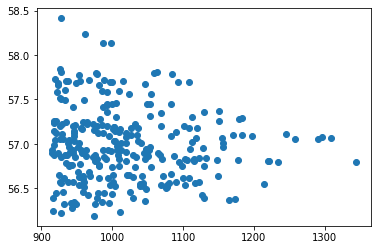

In [123]:
plt.scatter(x, y)
plt.show()  # or plt.savefig("name.png")

### Przykład - dane Covid z USA

In [124]:
covid_data = pd.read_csv("all-states-history.csv")
covid_data.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-20,AK,A,101.0,101.0,0,NaN,606.0,606.0,127.0,...,904712.0,5913,NaN,NaN,NaN,NaN,NaN,0,904712.0,5913
1,2020-11-20,AL,A,3451.0,3148.0,32,303.0,23449.0,23449.0,1329.0,...,1508212.0,11495,NaN,NaN,69249.0,NaN,NaN,0,1508212.0,11495
2,2020-11-20,AR,A+,2321.0,2125.0,24,196.0,8353.0,8353.0,928.0,...,1565873.0,13423,NaN,21856.0,NaN,112784.0,NaN,0,1565873.0,13423
3,2020-11-20,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-11-20,AZ,A+,6427.0,5961.0,43,466.0,24052.0,24052.0,1835.0,...,2063889.0,26601,355101.0,NaN,NaN,NaN,2063889.0,26601,NaN,0


Filtrujemy dane wybierając tylko te dotyczące konkretnego stanu.

In [125]:
dataframe = covid_data.query("state == 'AK'")
dataframe.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-20,AK,A,101.0,101.0,0,NaN,606.0,606.0,127.0,...,904712.0,5913,NaN,NaN,NaN,NaN,NaN,0,904712.0,5913
56,2020-11-19,AK,A,101.0,101.0,1,NaN,593.0,593.0,139.0,...,898799.0,13241,NaN,NaN,NaN,NaN,NaN,0,898799.0,13241
112,2020-11-18,AK,A,100.0,100.0,0,NaN,584.0,584.0,147.0,...,885558.0,6936,NaN,NaN,NaN,NaN,NaN,0,885558.0,6936
168,2020-11-17,AK,A,100.0,100.0,2,NaN,562.0,562.0,136.0,...,878622.0,6275,NaN,NaN,NaN,NaN,NaN,0,878622.0,6275
224,2020-11-16,AK,A,98.0,98.0,0,NaN,559.0,559.0,143.0,...,872347.0,4965,NaN,NaN,NaN,NaN,NaN,0,872347.0,4965


Tworzymy wykres na podstawie początkowych danych.

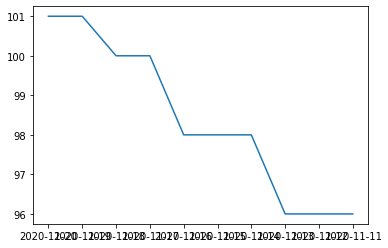

In [126]:
x = dataframe.date[:10]
y = dataframe.death[:10]
plt.plot(x, y)
plt.show()

Filtrujemy dane zostawiając tylko dwie kolumny.

In [127]:
dataframe = covid_data.filter(items=["state", "death"])
dataframe.head()

,state,death
0,AK,101.0
1,AL,3451.0
2,AR,2321.0
3,AS,0.0
4,AZ,6427.0


Grupujemy dane po stanach i sumujemy.

In [128]:
dataframe = dataframe.groupby("state").sum()
dataframe.head()

,death
state,
AK,7576.0
AL,359044.0
AR,166033.0
AS,0.0
AZ,744989.0


Tworzymy wykres kolumnowy.

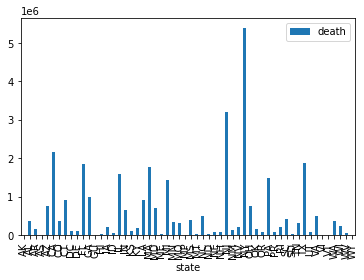

In [129]:
dataframe.plot(kind="bar")
plt.show()